In [22]:
import matplotlib.pyplot as plt

def draw(title, steps, training_loss, validation_loss):
    plt.figure(figsize=(5, 3))
    plt.plot(steps, training_loss, label='Training Loss', marker='o')
    plt.plot(steps, validation_loss, label='Validation Loss', marker='s')
    plt.title(title)
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


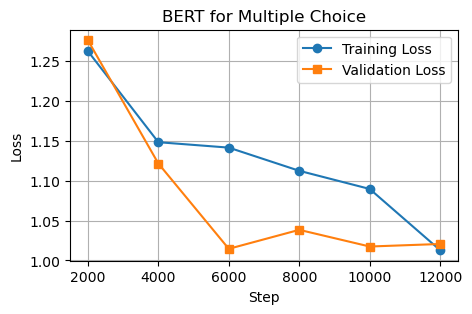

In [ ]:
# 35% -> 63%
# 19m17s
draw(
    title = 'BERT for Multiple Choice',
    steps = [2000, 4000, 6000, 8000, 10000, 12000],
    training_loss = [1.262800, 1.148500, 1.141700, 1.112600, 1.089800, 1.012900],
    validation_loss = [1.276520, 1.121753, 1.014657, 1.038490, 1.017549, 1.020732]
)

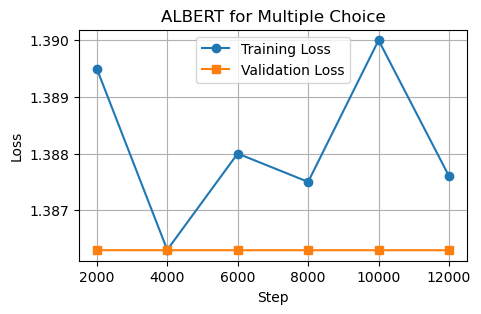

In [ ]:
# 24% -> 26%
# 19m39s
draw(
    title = 'ALBERT for Multiple Choice',
    steps = [2000, 4000, 6000, 8000, 10000, 12000],
    training_loss = [1.389500, 1.386300, 1.388000, 1.387500, 1.390000, 1.387600],
    validation_loss = [1.386295, 1.386294, 1.386294, 1.386294, 1.386294, 1.386294]
)

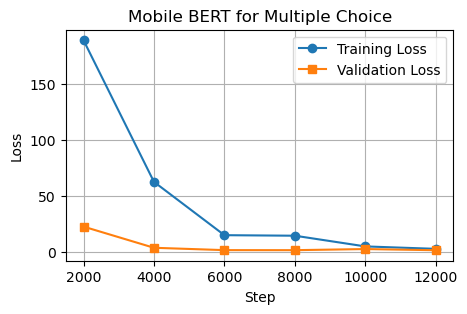

In [ ]:
# 24% -> 26%
# 13m10s
draw(
    title='Mobile BERT for Multiple Choice',
    steps = [2000, 4000, 6000, 8000, 10000, 12000],
    training_loss = [189.430600, 62.611100, 14.889400, 14.408600, 4.832500, 2.651700],
    validation_loss = [22.551016, 3.610789, 1.505004, 1.466732, 2.467266, 1.422763]
)

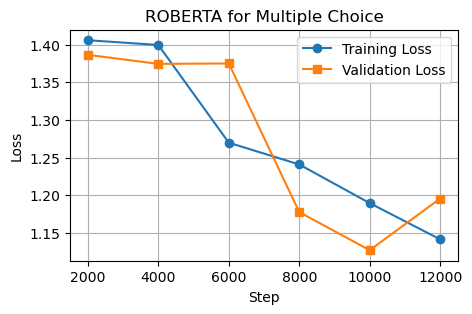

In [28]:
# 24% -> 54%
# 20m13s
draw(
    title='ROBERTA for Multiple Choice',
    steps = [2000, 4000, 6000, 8000, 10000, 12000],
    training_loss = [1.405700, 1.399400, 1.269700, 1.240800, 1.189500, 1.141400],
    validation_loss = [1.386256, 1.374313, 1.374864, 1.177613, 1.126991, 1.195610]
)

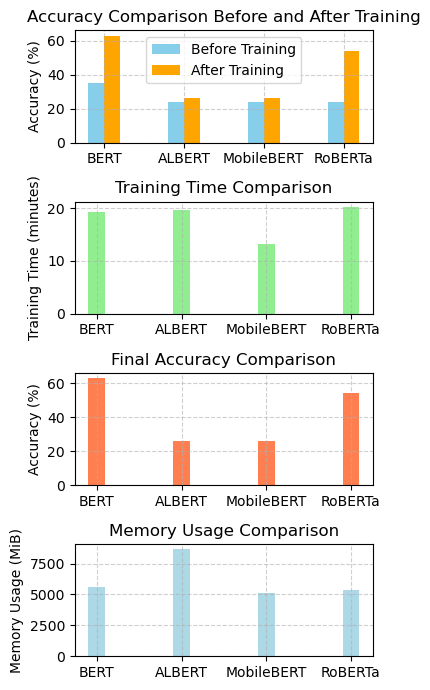

分析原因與優劣：
1. BERT: 初始準確率較低，但經過訓練後提升顯著，訓練時間適中，記憶體使用量適中，適合對準確率要求高的任務。
2. ALBERT: 訓練前後準確率變化小，表示其訓練效率較低，但記憶體使用量最高，適合資源充裕的環境。
3. MobileBERT: 訓練前後準確率變化小，但訓練時間最短，記憶體使用量最低，適合需要快速訓練和資源受限的應用場景。
4. RoBERTa: 訓練後準確率僅次於 BERT，但訓練時間較長，記憶體使用量較高，適合需要準確率與資源平衡的場景。


In [31]:
import matplotlib.pyplot as plt
import numpy as np

# 模型名稱
models = ["BERT", "ALBERT", "MobileBERT", "RoBERTa"]

# 訓練前後準確率
accuracy_before = [35, 24, 24, 24]  # 訓練前準確率（%）
accuracy_after = [63, 26, 26, 54]   # 訓練後準確率（%）

# 訓練時間（分鐘）
training_time = [19 * 60 + 17, 19 * 60 + 39, 13 * 60 + 10, 20 * 60 + 13]  # 轉換為秒
training_time_minutes = [t / 60 for t in training_time]  # 轉換為分鐘

# 記憶體使用量（MiB）
memory_usage = [5562, 8640, 5094, 5340]

# 繪製準確率的柱狀圖
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(4, 1, figsize=(4, 7))

# 準確率前後比較
ax[0].bar(x - width/2, accuracy_before, width, label="Before Training", color='skyblue')
ax[0].bar(x + width/2, accuracy_after, width, label="After Training", color='orange')
ax[0].set_title("Accuracy Comparison Before and After Training")
ax[0].set_ylabel("Accuracy (%)")
ax[0].set_xticks(x)
ax[0].set_xticklabels(models)
ax[0].legend()
ax[0].grid(True, linestyle='--', alpha=0.6)

# 訓練時間
ax[1].bar(x, training_time_minutes, width, color='lightgreen')
ax[1].set_title("Training Time Comparison")
ax[1].set_ylabel("Training Time (minutes)")
ax[1].set_xticks(x)
ax[1].set_xticklabels(models)
ax[1].grid(True, linestyle='--', alpha=0.6)

# 訓練後準確率
ax[2].bar(x, accuracy_after, width, color='coral')
ax[2].set_title("Final Accuracy Comparison")
ax[2].set_ylabel("Accuracy (%)")
ax[2].set_xticks(x)
ax[2].set_xticklabels(models)
ax[2].grid(True, linestyle='--', alpha=0.6)

# 記憶體使用量
ax[3].bar(x, memory_usage, width, color='lightblue')
ax[3].set_title("Memory Usage Comparison")
ax[3].set_ylabel("Memory Usage (MiB)")
ax[3].set_xticks(x)
ax[3].set_xticklabels(models)
ax[3].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# 分析原因與優劣
print("分析原因與優劣：")
print("1. BERT: 初始準確率較低，但經過訓練後提升顯著，訓練時間適中，記憶體使用量適中，適合對準確率要求高的任務。")
print("2. ALBERT: 訓練前後準確率變化小，表示其訓練效率較低，但記憶體使用量最高，適合資源充裕的環境。")
print("3. MobileBERT: 訓練前後準確率變化小，但訓練時間最短，記憶體使用量最低，適合需要快速訓練和資源受限的應用場景。")
print("4. RoBERTa: 訓練後準確率僅次於 BERT，但訓練時間較長，記憶體使用量較高，適合需要準確率與資源平衡的場景。")

bert
* 35% -> 63%
* 19m17s
* 5562MiB

albert
* 24% -> 26%
* 19m39s
* 8640MiB

moble bert
* 24% -> 26%
* 13m10s
* 5094MiB

roberta
* 24% -> 54%
* 20m13s
* 5340MiB

zero shot classification
* 61%
* 0s
* 3452MiB

sequence classification - bert
* 26%
* 9m15s
* 2786MiB

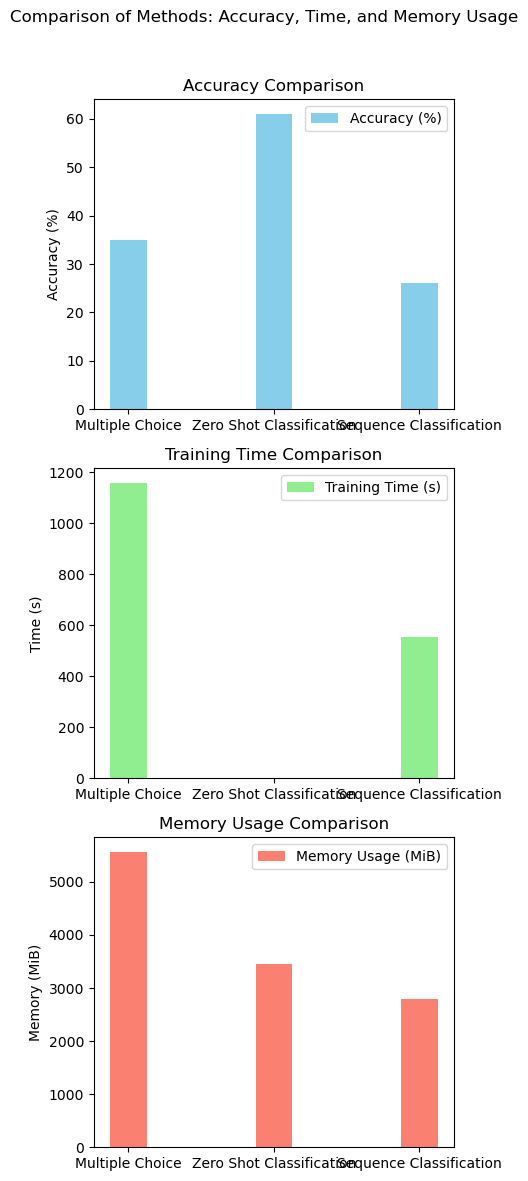

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for comparison
methods = ['Multiple Choice', 'Zero Shot Classification', 'Sequence Classification']
accuracy = [35, 61, 26]  # in %
time = [19 * 60 + 17, 0, 9 * 60 + 15]  # in seconds
memory = [5562, 3452, 2786]  # in MiB

# Define bar width and positions
bar_width = 0.25
indices = np.arange(len(methods))

# Plot each metric in separate subplots
fig, axs = plt.subplots(3, 1, figsize=(7, 7))
fig.suptitle('Comparison of Methods: Accuracy, Time, and Memory Usage')

# Accuracy bar chart
axs[0].bar(indices, accuracy, bar_width, color='skyblue', label='Accuracy (%)')
axs[0].set_title('Accuracy Comparison')
axs[0].set_xticks(indices)
axs[0].set_xticklabels(methods)
axs[0].set_ylabel('Accuracy (%)')
axs[0].legend()

# Time bar chart
axs[1].bar(indices, time, bar_width, color='lightgreen', label='Training Time (s)')
axs[1].set_title('Training Time Comparison')
axs[1].set_xticks(indices)
axs[1].set_xticklabels(methods)
axs[1].set_ylabel('Time (s)')
axs[1].legend()

# Memory usage bar chart
axs[2].bar(indices, memory, bar_width, color='salmon', label='Memory Usage (MiB)')
axs[2].set_title('Memory Usage Comparison')
axs[2].set_xticks(indices)
axs[2].set_xticklabels(methods)
axs[2].set_ylabel('Memory (MiB)')
axs[2].legend()

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()